# Machine Failure Prediction

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
data = pd.read_csv('/Users/himanishprakash/Desktop/ml on cloud/predictive_maintenance (1).csv')

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [49]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'nf'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Data Preprocessing

The UDI and Product ID column is not needed as it doesnt carry any useful information

In [5]:
data = data.drop(["UDI",'Product ID'],axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


# EDA

In [6]:
data.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [ ]:
data.groupby(['Type','Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

# Data Visualisation

<Axes: xlabel='Target', ylabel='count'>

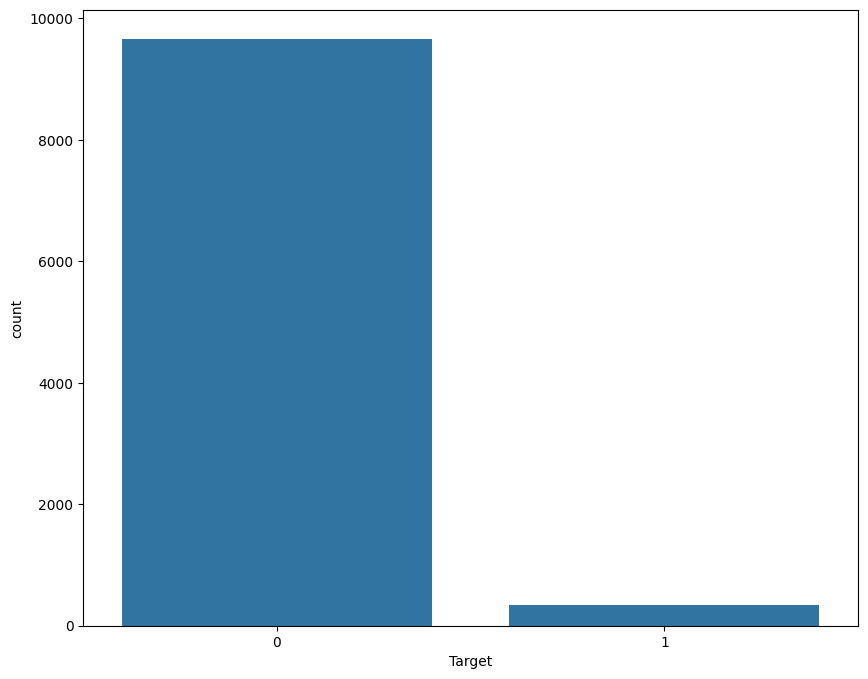

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")

<Axes: xlabel='Failure Type', ylabel='count'>

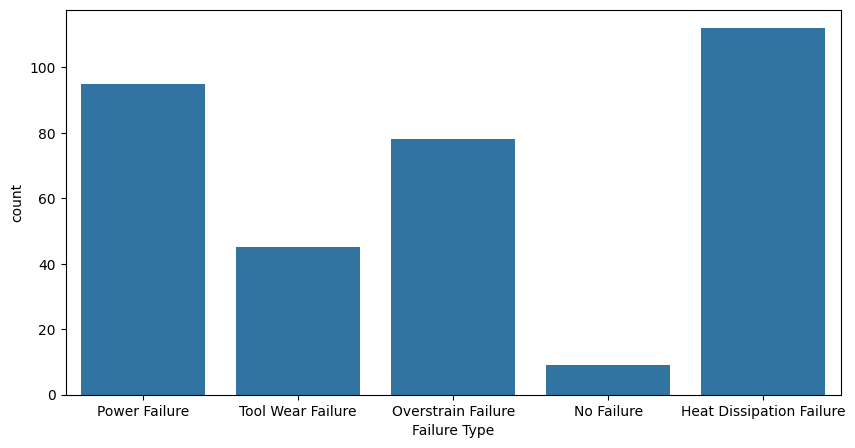

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

### Note : We will focus on target detection for now and ignore error type

In [18]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

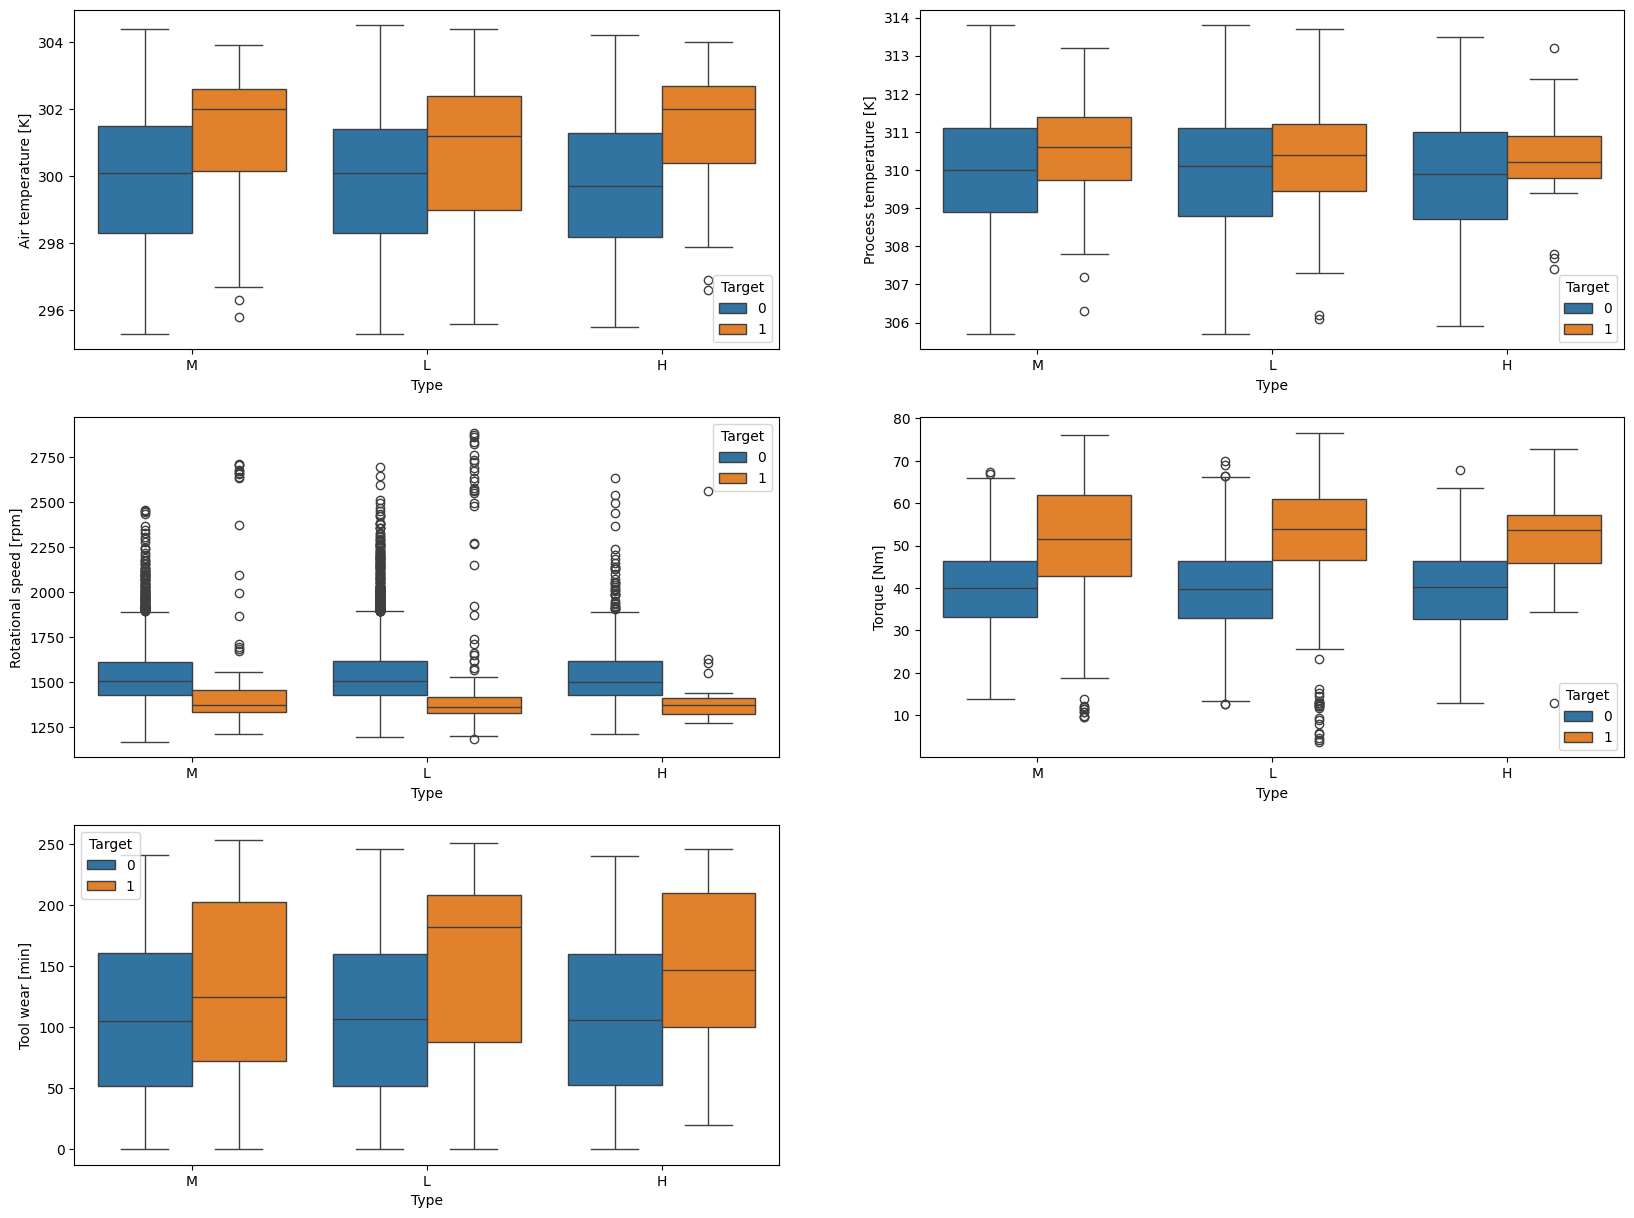

In [19]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=data,y=i,x="Type",hue="Target")
    m+=1

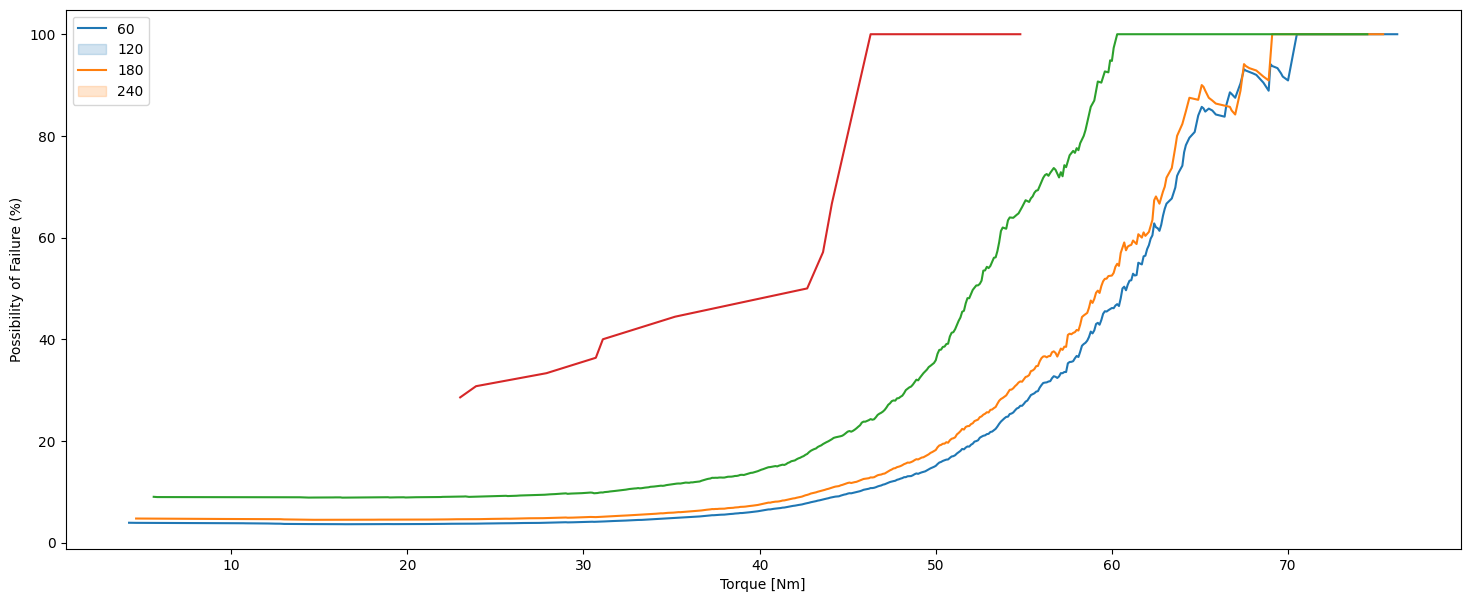

In [26]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [60,120,180,240]:
    datasets.append(data[data['Tool wear [min]']>=i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend([60,120,180,240])

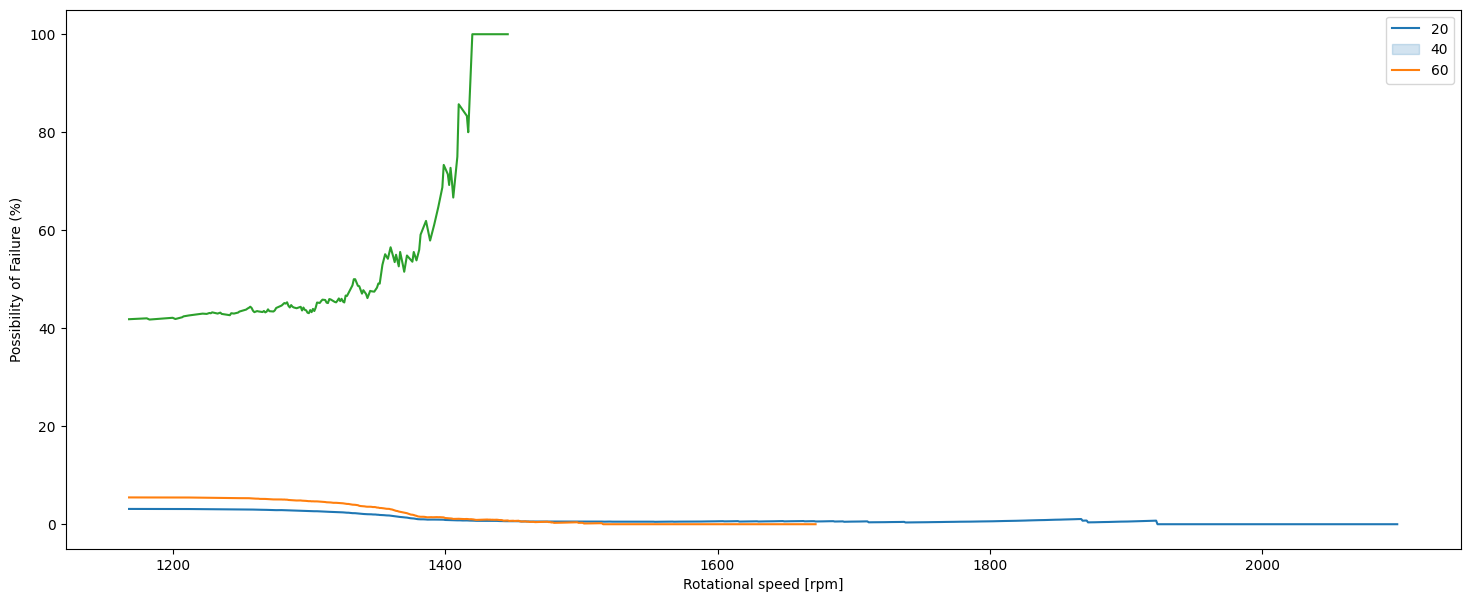

In [27]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [20,40,60]:
    datasets.append(data[data['Torque [Nm]']>=i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend([20,40,60])

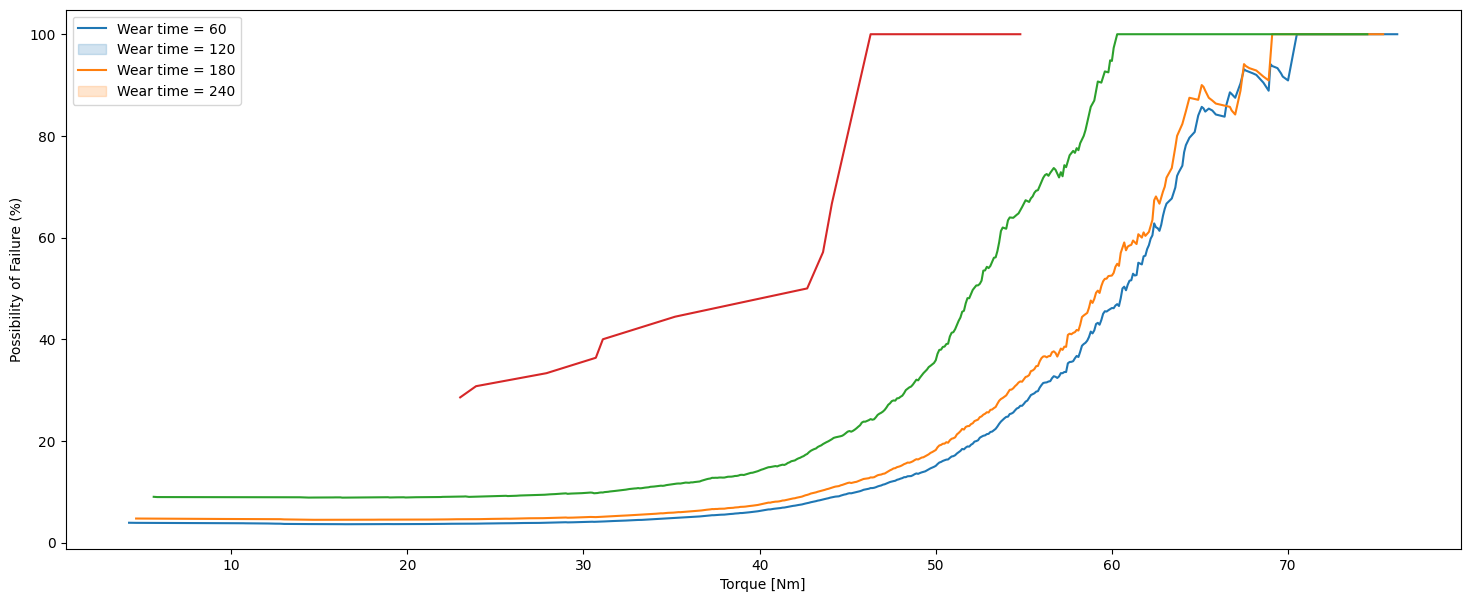

In [28]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [60,120,180,240]:
    datasets.append(data[data['Tool wear [min]']>=i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["Wear time = " + "60",
            "Wear time = "+'120',
            "Wear time = "+'180',
            "Wear time = "+'240'])

Failure chance by Tool Type vs Torque

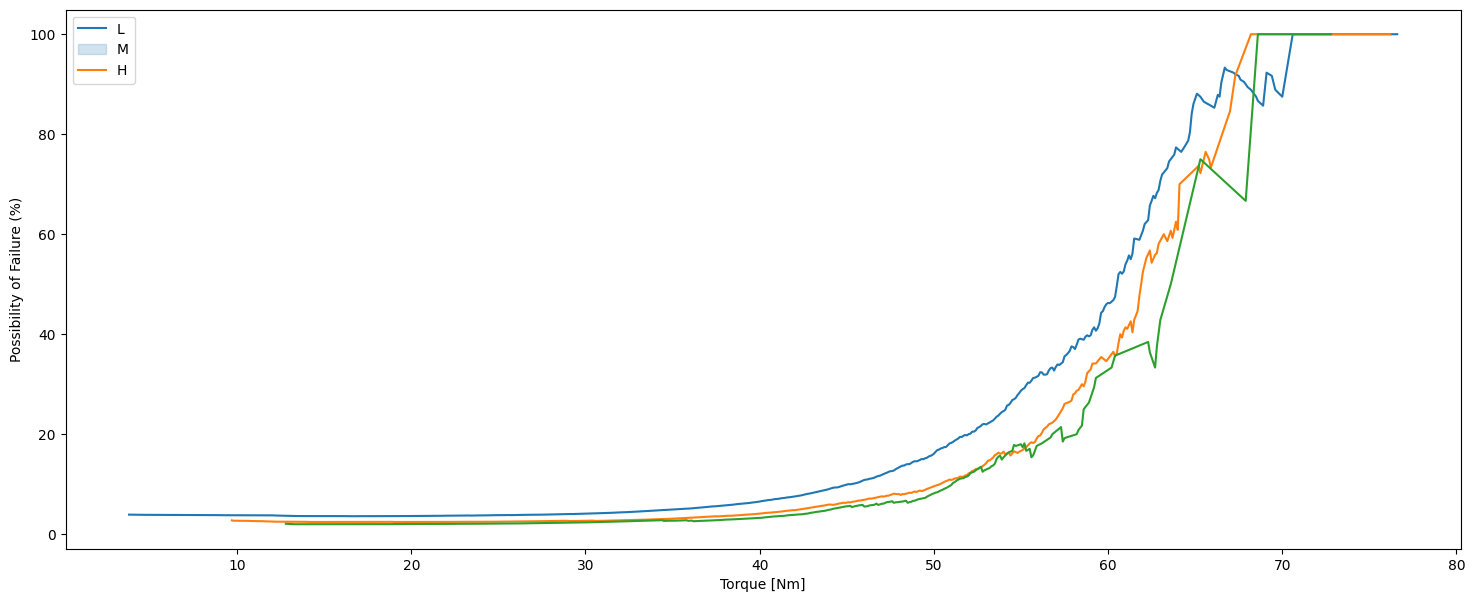

In [29]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

Tool Type 

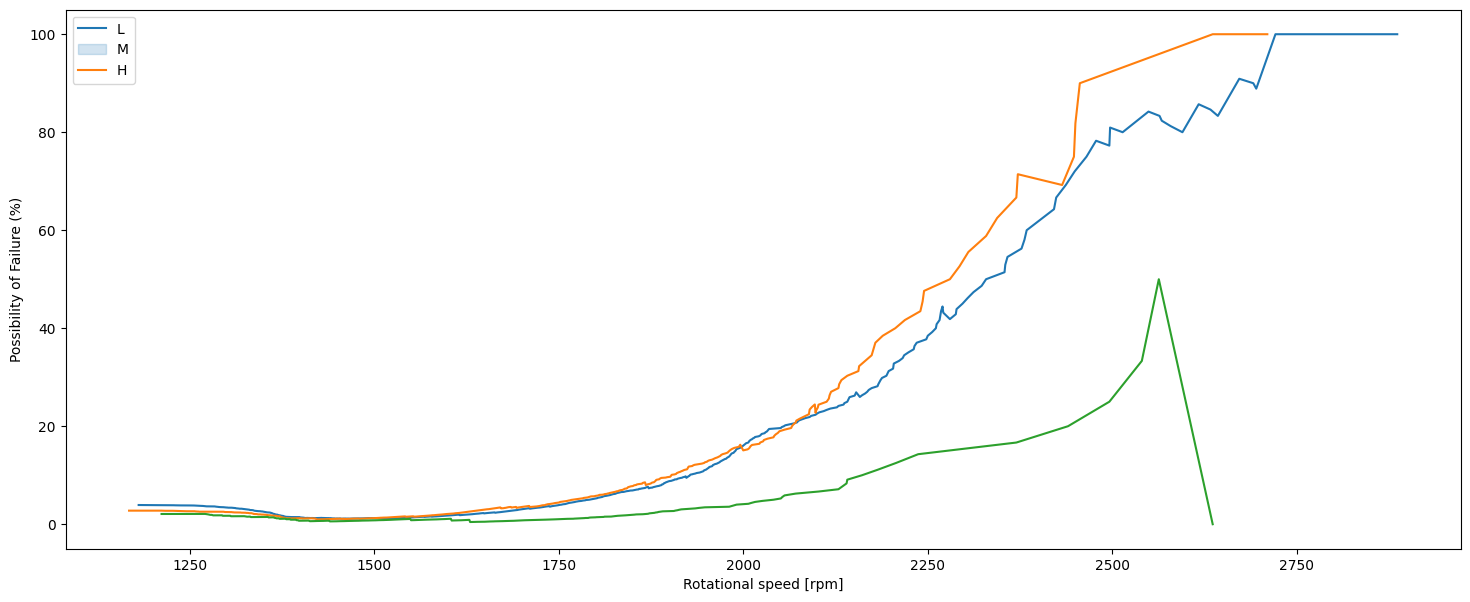

In [30]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

Tool Type vs wear Time

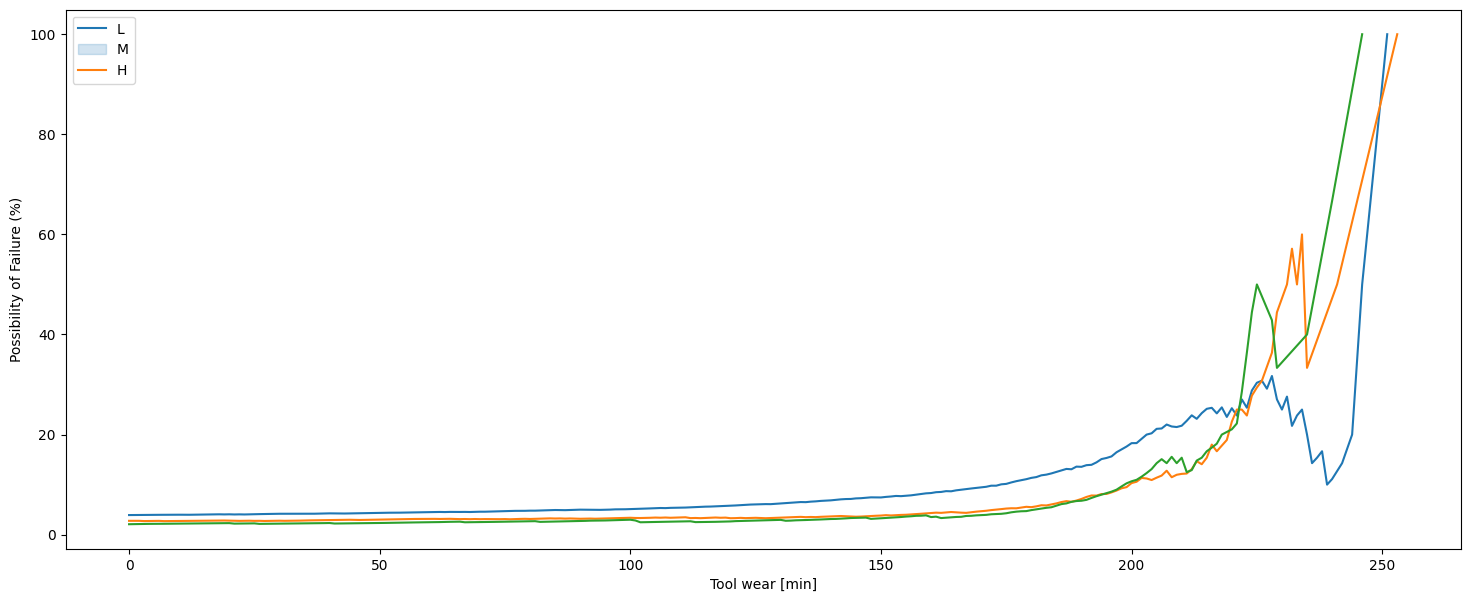

In [31]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Tool wear [min]",i)
    plt.xlabel("Tool wear [min]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')
    
    m+=1

plt.legend(["L","M","H"])

# Pre Processing for Prediction 

## Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

In [35]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1212.5
9999,2,299.0,308.7,1500,40.2,30,0,No Failure,1206.0


data = data.rename(columns = {'Air temperature [K]':'airtemp',
                      'Process temperature [K]':'processtemp',
                      'Rotational speed [rpm]':'rpm',
                      'Torque [Nm]':'torque',
                      'Tool wear [min]':'toolwear'})

## Test Tain Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)

## Prediction

In [40]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]



#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [41]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [42]:
display(classifiers)

,Classifier,Imported as
0,Multi Layer Perceptron,mlp
1,Bagging,bc
2,Gradient Boosting,gbc
3,Ada Boost,ada
4,XG Boost,xgb
5,Logistic Regression,lr
6,Random Forest,rfc
7,k Nearest Neighbours,knn
8,Support Vector Machine,svc
9,SVM tuning grid,grid


In [43]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   nf                       7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [45]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [46]:
classification.results()

,Models,Accuracy,Runtime (s)
0,BaggingClassifier,98.967,0.230890
1,RandomForestClassifier,98.967,0.546099
2,StackingClassifier,98.867,1.124556
3,GradientBoostingClassifier,98.800,0.706783
4,AdaBoostClassifier,97.667,0.171549
5,LogisticRegression,97.333,0.241442
6,KNeighborsClassifier,96.067,0.110380
7,MLPClassifier,95.633,0.557902


In [47]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: BaggingClassifier
Accuracy of model: 98.967
Training Runtime in seconds 0.231
Classification Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.91      0.74      0.82        93

    accuracy                           0.99      3000
   macro avg       0.95      0.87      0.91      3000
weighted avg       0.99      0.99      0.99      3000

